# Introduction to Bokeh

## A python library for creating interactive visualizations for modern web browsers

## Installation

It can be installed using `pip` or `conda`

Run `pip install bokeh`
OR 
Run `conda install bokeh`

Gallery[https://docs.bokeh.org/en/latest/docs/gallery.html]

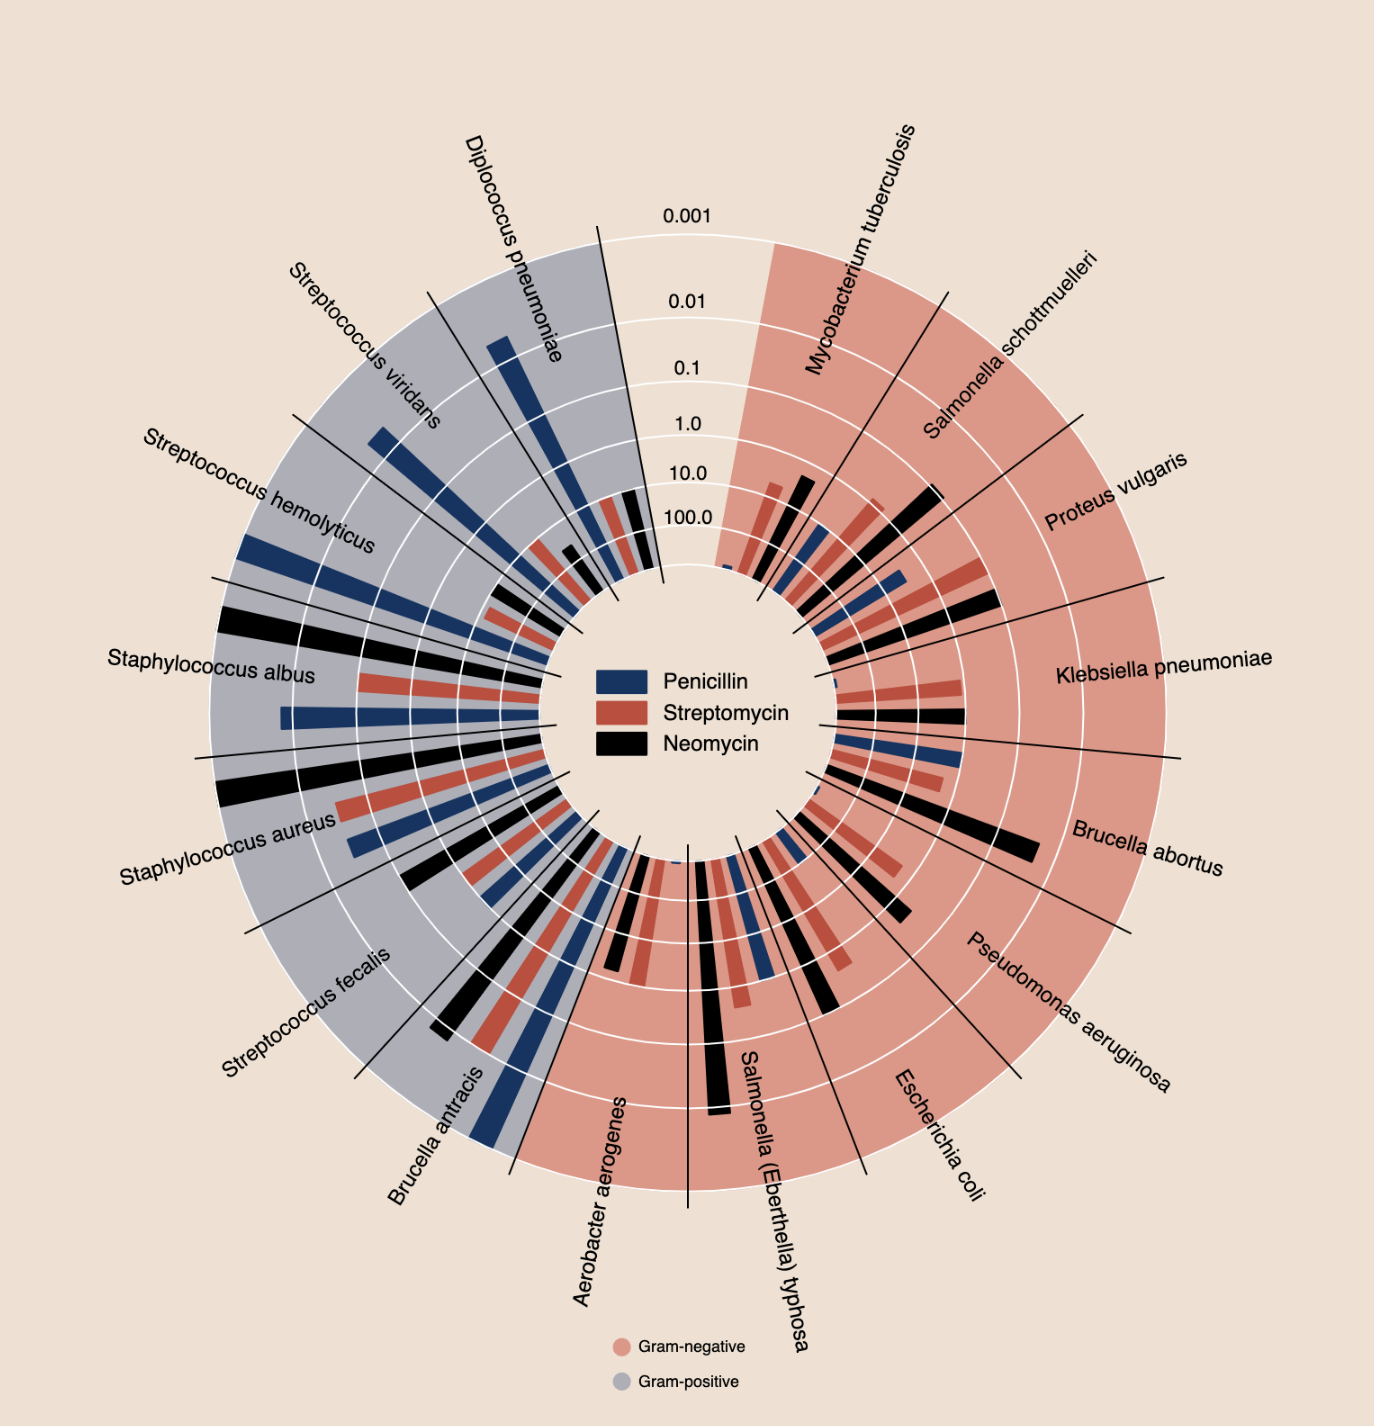

In [1]:
from IPython.display import Image
remote_image = Image(filename = "Pictures/burtin.png", width=500, height=500)
display(remote_image)

# Import all required packages

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

import numpy as np
from math import pi

from bokeh.layouts import gridplot, row, column, widgetbox
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter, Slider, Range1d

from bokeh.transform import dodge, transform, cumsum
from bokeh.io import export_png, curdoc

from bokeh.palettes import Category20c, Inferno256, Category10
output_notebook()

Loading BokehJS ...

In [3]:
# Install openpyxl for reading frm excel sheets, for ease we have conevrted the ecel tp binary format pickle.

# !conda install --y openpyxl

# GTD = pd.read_excel("Datasets/GTD_Dataset.xlsx")
# print(GTD.shape)

# GTD.to_pickle("Datasets/GTD_Dataset.pkl")

In [4]:
GTD_full = pd.read_pickle("Datasets/GTD_Dataset.pkl")

# Filter all required columns

GTD_full = GTD_full[['eventid', 'iyear', 'region_txt', 'country_txt', 'nkill', 'nwound', 'city', 'targtype1_txt', 'attacktype1_txt', 'weaptype1_txt', 'property', 'propextent','imonth', 'scite1', 'scite2', 'scite3', 'propvalue']]
GTD_full.head()

,eventid,iyear,region_txt,country_txt,nkill,nwound,city,targtype1_txt,attacktype1_txt,weaptype1_txt,property,propextent,imonth,scite1,scite2,scite3,propvalue
0,197000000001,1970,Central America & Caribbean,Dominican Republic,1.000,0.000,Santo Domingo,Private Citizens & Property,Assassination,Unknown,0,NaN,7,NaN,NaN,NaN,NaN
1,197000000002,1970,North America,Mexico,0.000,0.000,Mexico city,Government (Diplomatic),Hostage Taking (Kidnapping),Unknown,0,NaN,0,NaN,NaN,NaN,NaN
2,197001000001,1970,Southeast Asia,Philippines,1.000,0.000,Unknown,Journalists & Media,Assassination,Unknown,0,NaN,1,NaN,NaN,NaN,NaN
3,197001000002,1970,Western Europe,Greece,NaN,NaN,Athens,Government (Diplomatic),Bombing/Explosion,Explosives,1,NaN,1,NaN,NaN,NaN,NaN
4,197001000003,1970,East Asia,Japan,NaN,NaN,Fukouka,Government (Diplomatic),Facility/Infrastructure Attack,Incendiary,1,NaN,1,NaN,NaN,NaN,NaN


In [5]:
GTD = GTD_full[GTD_full.country_txt != 'United Kingdom']
UK = GTD_full[GTD_full.country_txt == 'United Kingdom']


print("Some basic stats\n")
print(f"There were {GTD.shape[0]} terrorist events in the world and {UK.shape[0]} in UK from {GTD_full.iyear.min()} to {GTD_full.iyear.max()}")

print("*****************************************************************************")
print("There were", round(GTD.nkill.sum()/1000,0).astype(str)+ 'K',"casualties and",\
      round(GTD.nwound.sum()/1000,0).astype(str)+ 'K', " injuries due to terrorist attacks in the world")
print(f"There were {round(UK.nkill.sum()/1000,0).astype(str)+ 'K'} casualties and {round(UK.nwound.sum()/1000,0).astype(str)+ 'K'} injuries in UK" )



Some basic stats

There were 186129 terrorist events in the world and 5335 in UK from 1970 to 2018
*****************************************************************************
There were 432.0K casualties and 544.0K  injuries due to terrorist attacks in the world
There were 3.0K casualties and 6.0K injuries in UK


### Yearwise distribution of events

In [6]:
Yearly_events_G = GTD.groupby(["iyear"])\
                    .count()['eventid']\
                    .reset_index()\
                    .rename(columns = {'iyear' : 'Year', 'eventid' : 'Attacks'})\
                    .sort_values(by=['Year'], ascending = True )
Yearly_events_G['Formatted_Date'] = pd.to_datetime(Yearly_events_G.Year, format='%Y')
Yearly_events_G['Attacks'] = np.log(Yearly_events_G['Attacks'])
Yearly_events_G.head()

,Year,Attacks,Formatted_Date
0,1970,6.460,1970-01-01
1,1971,5.966,1971-01-01
2,1972,5.620,1972-01-01
3,1973,5.649,1973-01-01
4,1974,5.935,1974-01-01


In [7]:
Yearly_events_UK = UK.groupby(["iyear"])\
                    .count()['eventid'].reset_index()\
                    .rename(columns = {'iyear' : 'Year', 'eventid' : 'Attacks_UK'})\
                    .sort_values(by=['Year'], ascending = True )
Yearly_events_UK['Formatted_Date'] = pd.to_datetime(Yearly_events_UK.Year, format='%Y')
Yearly_events_UK['Attacks_UK'] = np.log(Yearly_events_UK['Attacks_UK'])
Yearly_events_UK.head()

,Year,Attacks_UK,Formatted_Date
0,1970,2.485,1970-01-01
1,1971,4.394,1971-01-01
2,1972,5.677,1972-01-01
3,1973,5.242,1973-01-01
4,1974,5.313,1974-01-01


In [8]:
merged = Yearly_events_G.merge(Yearly_events_UK, left_on = 'Year', right_on = 'Year', how= 'inner') [['Year','Attacks', 'Attacks_UK', 'Formatted_Date_x']]
merged.head()


,Year,Attacks,Attacks_UK,Formatted_Date_x
0,1970,6.460,2.485,1970-01-01
1,1971,5.966,4.394,1971-01-01
2,1972,5.620,5.677,1972-01-01
3,1973,5.649,5.242,1973-01-01
4,1974,5.935,5.313,1974-01-01


In [9]:
src = ColumnDataSource(merged)

p1 = figure(x_axis_type="datetime", title="")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Year'
p1.yaxis.axis_label = 'Number of Terrorist Events (Log scaled)'
p1.y_range = Range1d(0,10)

p1.line('Formatted_Date_x', 'Attacks', line_color='red', source = src, legend_label = 'Global', line_width = 2.0)
p1.line('Formatted_Date_x', 'Attacks_UK', line_color='green', source = src, legend_label = 'UK', line_width = 2.0)

p1.axis.major_label_text_font_size = "7pt"
p1.legend.label_text_font_size = "9pt"
p1.legend.location = 'top_left'
hover = HoverTool(tooltips = [
    ('Year', '@Year'),
    ('Global Events', '@Attacks'),
    ('United Kingdom', '@Attacks_UK')])
p1.add_tools(hover)
show(p1)

### Regionwise distribution of events

In [10]:
Region_wise_events = GTD.groupby(["iyear", "region_txt"])\
                        .count()['eventid'].reset_index()\
                        .rename(columns = {'iyear' : 'Year','region_txt' :'Region','eventid' : 'Attacks'})\
                        .sort_values(by=['Year'], ascending = True )
Region_wise_events['Formatted_Date'] = pd.to_datetime(Region_wise_events.Year, format='%Y')
Region_wise_events = pd.pivot_table(Region_wise_events, values='Attacks', index=['Year', 'Formatted_Date'],
                                    columns=['Region'], aggfunc=np.sum).reset_index()
Region_wise_events = Region_wise_events.fillna(0)
Region_wise_events.head()

Region,Year,Formatted_Date,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
0,1970,1970-01-01,1.000,7.000,0.000,2.000,12.000,28.000,472.000,65.000,1.000,10.000,3.000,38.000
1,1971,1971-01-01,1.000,5.000,0.000,1.000,5.000,55.000,247.000,24.000,0.000,6.000,2.000,44.000
2,1972,1972-01-01,8.000,3.000,0.000,0.000,1.000,53.000,73.000,33.000,1.000,16.000,4.000,84.000
3,1973,1973-01-01,1.000,6.000,0.000,2.000,1.000,19.000,64.000,83.000,1.000,2.000,4.000,101.000
4,1974,1974-01-01,1.000,11.000,0.000,4.000,2.000,42.000,111.000,81.000,2.000,3.000,7.000,114.000


In [11]:
from bokeh.palettes import Inferno10, Spectral6
src_R = ColumnDataSource(Region_wise_events)


p2 = figure(x_axis_type="datetime", title="Terrorism activities over the years(1970-2018) in different regions")
p2.grid.grid_line_alpha=0.3
p2.xaxis.axis_label = 'Year'
p2.yaxis.axis_label = 'Number of Terrorist Events'


p2.line('Formatted_Date', 'Australasia & Oceania', line_color='#081d58', source = src_R, legend_label = '1.Australasia & Oceania')
p2.line('Formatted_Date', 'Central America & Caribbean', line_color='#253494', source = src_R, legend_label = '2.Central America & Caribbean')
p2.line('Formatted_Date', 'Central Asia', line_color='#225ea8', source = src_R, legend_label = '3.Central Asia')
p2.line('Formatted_Date', 'East Asia', line_color='#1d91c0', source = src_R, legend_label = '4.East Asia')
p2.line('Formatted_Date', 'Eastern Europe', line_color='#41b6c4', source = src_R, legend_label = '5.Eastern Europe')
p2.line('Formatted_Date', 'Middle East & North Africa', line_color='red', source = src_R, legend_label = '6.Middle East & North Africa', line_width = 2.0)
p2.line('Formatted_Date', 'North America', line_color='#c7e9b4', source = src_R, legend_label = '7.North America')
p2.line('Formatted_Date', 'South America', line_color='#edf8b1', source = src_R, legend_label = '8.South America')
p2.line('Formatted_Date', 'South Asia', line_color='green', source = src_R, legend_label = '9.South Asia', line_width = 2.0)
p2.line('Formatted_Date', 'Southeast Asia', line_color='#CD4247', source = src_R, legend_label = '10.Southeast Asia')
p2.line('Formatted_Date', 'Sub-Saharan Africa', line_color='blue', source = src_R, legend_label = '11.Sub-Saharan Africa', line_width = 2.0)
p2.line('Formatted_Date', 'Western Europe', line_color='#000003', source = src_R, legend_label = '12.Western Europe')

p2.legend.label_text_font_size = "9pt"
p2.legend.click_policy='hide'
p2.legend.location = "top_left"
p2.axis.major_label_text_font_size = "7pt"
hover = HoverTool(tooltips = [('Year', '@Year')])
p2.add_tools(hover)

show(p2)

### Total events and fatalities in region

In [12]:
Casualities = GTD.groupby("region_txt")\
                .agg({'eventid' :'count', 'nkill' : 'sum', 'nwound' : 'sum'})\
                .reset_index()\
                .rename(columns = {'region_txt' : 'Region',
                                   'eventid' : 'Attacks',
                                   'nkill' : 'Fatalities',
                                   'nwound' : 'Wounded'})

Casualities['Attacks_Percent'] = Casualities['Attacks']*100/Casualities['Attacks'].sum()
Casualities['Fatalities_Percent'] = Casualities['Fatalities']*100/Casualities['Fatalities'].sum()
Casualities['Wounded_Percent'] = Casualities['Wounded']*100/Casualities['Wounded'].sum()
Casualities.sort_values(by=['Attacks_Percent', 'Fatalities_Percent', 'Wounded_Percent'], ascending=False, inplace=True)
Casualities


,Region,Attacks,Fatalities,Wounded,Attacks_Percent,Fatalities_Percent,Wounded_Percent
5,Middle East & North Africa,53110,142214.000,219609.000,28.534,32.953,40.398
8,South Asia,48266,112263.000,151199.000,25.931,26.013,27.814
10,Sub-Saharan Africa,19752,85020.000,56630.000,10.612,19.700,10.417
7,South America,19292,29052.000,17060.000,10.365,6.732,3.138
9,Southeast Asia,13363,16257.000,27164.000,7.179,3.767,4.997
11,Western Europe,11508,3232.000,12305.000,6.183,0.749,2.264
1,Central America & Caribbean,10359,28717.000,9013.000,5.565,6.654,1.658
4,Eastern Europe,5217,7457.000,12097.000,2.803,1.728,2.225
6,North America,3579,5017.000,27042.000,1.923,1.162,4.974
3,East Asia,808,1154.000,9215.000,0.434,0.267,1.695


In [13]:
import math
source = ColumnDataSource(data=Casualities)
Region = source.data['Region'].tolist()

p3 = figure(x_range=Region, y_range=(0, 45), plot_width = 700, plot_height=550, title="Total incidents,Casualties and Injured %age in different Regions (1970-2018)")

p3.vbar(x=dodge('Region', -0.25, range=p3.x_range), top='Attacks_Percent', width=0.2, source=source,
       color="darkturquoise", legend_label="Total Incidents")

p3.vbar(x=dodge('Region',  0.01,  range=p3.x_range), top='Fatalities_Percent', width=0.2, source=source,
       color="indianred", legend_label="Casualities")

p3.vbar(x=dodge('Region',  0.27,  range=p3.x_range), top='Wounded_Percent', width=0.2, source=source,
       color="forestgreen", legend_label="Injured")

# p3.xaxis.axis_label = 'Region'
p3.yaxis.axis_label = 'Percentage'

p3.x_range.range_padding = 0.1
p3.xgrid.grid_line_color = None
p3.legend.location = "top_left"
p3.legend.orientation = "vertical"
p3.xaxis.major_label_orientation = math.pi/4
p3.axis.major_label_text_font_size = "7pt"
p3.legend.label_text_font_size = "9pt"

hover = HoverTool(tooltips = [('Terrorist Incidents', '@Attacks_Percent%'),
                             ('Casualties', '@Fatalities_Percent%'),
                             ('Injured', '@Wounded_Percent%')])
p3.add_tools(hover)
show(p3)

### Explore more terror attack prone regions

In [14]:
MENA = GTD[GTD['region_txt'] == 'Middle East & North Africa']
MN_country = MENA.groupby(['country_txt'])\
                .agg({'eventid' :'count', 'nkill' : 'sum', 'nwound' : 'sum'})\
                .reset_index()\
                .rename(columns = {'country_txt' : 'Country',
                                   'eventid' : 'Attacks',
                                   'nkill' : 'Fatalities',
                                   'nwound' : 'Wounded'})
MN_country['MN_Attacks_Percent'] = MN_country['Attacks']*100/MN_country['Attacks'].sum()
MN_country['MN_Fatalities_Percent'] = MN_country['Fatalities']*100/MN_country['Fatalities'].sum()
MN_country['MN_Wounded_Percent'] = MN_country['Wounded']*100/MN_country['Wounded'].sum()

MN_country = MN_country[MN_country.MN_Attacks_Percent>3.0]
MN_country

(53110, 17)

In [16]:
source_MN = ColumnDataSource(data=MN_country)
MN_Country = source_MN.data['Country'].tolist()
# MN_Country

p4 = figure(x_range=MN_Country, y_range=(0, 65), plot_height=350, title="Terrorist events, Casualties and Injuries in Middle East and North Africa")


p4.vbar(x=dodge('Country', -0.25, range=p4.x_range), top='MN_Attacks_Percent', width=0.2, source=source_MN,
       color="darkturquoise", legend_label="Total Incidents")

p4.vbar(x=dodge('Country',  0.01,  range=p4.x_range), top='MN_Fatalities_Percent', width=0.2, source=source_MN,
       color="indianred", legend_label="Casualities")

p4.vbar(x=dodge('Country',  0.27,  range=p4.x_range), top='MN_Wounded_Percent', width=0.2, source=source_MN,
       color="forestgreen", legend_label="Injured")

# p3.xaxis.axis_label = 'Region'
p4.yaxis.axis_label = 'Percentage'

p4.x_range.range_padding = 0.1
p4.xgrid.grid_line_color = None
p4.legend.location = "top_left"
p4.legend.orientation = "vertical"
p4.xaxis.major_label_orientation = math.pi/4
p4.axis.major_label_text_font_size = "7pt"
p4.legend.label_text_font_size = "9pt"

hover = HoverTool(tooltips = [('Terrorist Incidents', '@MN_Attacks_Percent%'),
                             ('Casualties', '@MN_Fatalities_Percent'),
                             ('Injured', '@MN_Wounded_Percent')])
p4.add_tools(hover)
show(p4)

### Exploring South Asia

In [17]:
South_Asia = GTD[GTD['region_txt'] == 'South Asia']
South_Asia.shape

(48266, 17)

In [19]:
SA_country = South_Asia.groupby(['country_txt'])\
            .agg({'eventid' :'count', 'nkill' : 'sum', 'nwound':'sum'})\
            .reset_index()\
            .rename(columns = {'country_txt' : 'Country',
                               'eventid' : 'Attacks',
                               'nkill' : 'Fatalities',
                               'nwound' : 'Wounded'})

SA_country['Attacks_Percent'] = SA_country['Attacks']*100/SA_country['Attacks'].sum()
SA_country['Fatalities_Percent'] = SA_country['Fatalities']*100/SA_country['Fatalities'].sum()
SA_country['Wounded_Percent'] = SA_country['Wounded']*100/SA_country['Wounded'].sum()
SA_country.sort_values(by=['Attacks_Percent', 'Fatalities_Percent', 'Wounded_Percent'], ascending=False, inplace=True)
SA_country

,Country,Attacks,Fatalities,Wounded,Attacks_Percent,Fatalities_Percent,Wounded_Percent
7,Pakistan,14847,24520.000,43299.000,30.761,21.842,28.637
0,Afghanistan,14509,49202.000,52121.000,30.060,43.827,34.472
3,India,12853,19753.000,29636.000,26.630,17.595,19.601
8,Sri Lanka,3029,15533.000,15566.000,6.276,13.836,10.295
1,Bangladesh,1682,1257.000,8266.000,3.485,1.120,5.467
6,Nepal,1314,1969.000,2183.000,2.722,1.754,1.444
4,Maldives,24,20.000,122.000,0.050,0.018,0.081
2,Bhutan,6,9.000,5.000,0.012,0.008,0.003
5,Mauritius,2,0.000,1.000,0.004,0.000,0.001


In [20]:
source_SA = ColumnDataSource(data=SA_country)
SA_Country = source_SA.data['Country'].tolist()

p5 = figure(x_range=SA_Country, y_range=(0, 45), plot_height=350, title="Terrorist events, Casualties and Injuries in South Asia")


p5.vbar(x=dodge('Country', -0.25, range=p5.x_range), top='Attacks_Percent', width=0.2, source=source_SA,
       color="darkturquoise", legend_label="Total Incidents")

p5.vbar(x=dodge('Country',  0.01,  range=p5.x_range), top='Fatalities_Percent', width=0.2, source=source_SA,
       color="indianred", legend_label="Casualities")

p5.vbar(x=dodge('Country',  0.27,  range=p5.x_range), top='Wounded_Percent', width=0.2, source=source_SA,
       color="forestgreen", legend_label="Injured")

# p5.x_range.range_padding = 0.1
# p5.xgrid.grid_line_color = None
p5.legend.location = "top_right"
p5.legend.orientation = "vertical"
p5.xaxis.major_label_orientation = math.pi/4
p5.axis.major_label_text_font_size = "7pt"
p5.legend.label_text_font_size = "9pt"
p5.yaxis.axis_label = 'Percentage'

hover = HoverTool(tooltips = [('Terrorist Events', '@SA_Attacks_Percent%'),
                             ('Casualties', '@SA_Fatalities_Percent%'),
                             ('Injured', '@SA_Wounded_Percent%')])
p5.add_tools(hover)
show(p5)

### Exploring sub saharan africa

In [21]:
SubSaharan_Africa = GTD[GTD['region_txt'] == 'Sub-Saharan Africa']
SubSaharan_Africa.shape

(19752, 17)

In [22]:
len(SubSaharan_Africa['country_txt'].unique())

49

In [23]:
SSA_country = SubSaharan_Africa.groupby('country_txt').agg({'eventid':'count', 'nkill': 'sum', 'nwound':'sum'}).reset_index()
SSA_country= SSA_country.rename(columns = {'country_txt' : 'Country',
                                        'eventid' : 'Attacks',
                                        'nkill' : 'Fatalities',
                                          'nwound' : 'Wounded'})
SSA_country['Attacks_Percent'] = SSA_country['Attacks']*100/SSA_country['Attacks'].sum()
SSA_country['Fatalities_Percent'] = SSA_country['Fatalities']*100/SSA_country['Fatalities'].sum()
SSA_country['Wounded_Percent'] = SSA_country['Wounded']*100/SSA_country['Wounded'].sum()
SSA_country = SSA_country[SSA_country['Attacks_Percent'] >= 3.0]
SSA_country.sort_values(by=['Attacks_Percent', 'Fatalities_Percent', 'Wounded_Percent'], ascending=False, inplace=True)

SSA_country.head()

,Country,Attacks,Fatalities,Wounded,Attacks_Percent,Fatalities_Percent,Wounded_Percent
38,Somalia,4674,11427.000,9703.000,23.663,13.440,17.134
30,Nigeria,4556,25258.000,11244.000,23.066,29.708,19.855
39,South Africa,2057,2698.000,4556.000,10.414,3.173,8.045
41,Sudan,1009,3925.000,2295.000,5.108,4.617,4.053
9,Democratic Republic of the Congo,938,5062.000,1640.000,4.749,5.954,2.896


In [24]:
source_SSA = ColumnDataSource(data=SSA_country)
SSA_country = source_SSA.data['Country'].tolist()

p6 = figure(x_range=SSA_country, y_range=(0, 35), plot_height=350, title="Terrorist events, Casualties and Injuries in Sub Saharan Africa")


p6.vbar(x=dodge('Country', -0.25, range=p6.x_range), top='Attacks_Percent', width=0.2, source=source_SSA,
       color="darkturquoise", legend_label="Total Incidents")

p6.vbar(x=dodge('Country',  0.01,  range=p6.x_range), top='Fatalities_Percent', width=0.2, source=source_SSA,
       color="indianred", legend_label="Casualties")

p6.vbar(x=dodge('Country',  0.27,  range=p6.x_range), top='Wounded_Percent', width=0.2, source=source_SSA,
       color="forestgreen", legend_label="Injured")


p6.x_range.range_padding = 0.1
p6.xgrid.grid_line_color = None
p6.legend.location = "top_right"
p6.legend.orientation = "vertical"
p6.xaxis.major_label_orientation = math.pi/4
p6.axis.major_label_text_font_size = "7pt"
p6.legend.label_text_font_size = "9pt"
p6.yaxis.axis_label = 'Percentage'
hover = HoverTool(tooltips = [('Terrorist Events', '@SSA_Attacks_Percent%'),
                             ('Casualties', '@SSA_Fatalities_Percent%'),
                             ('Injured', '@SSA_Wounded_Percent%')])
p6.add_tools(hover)
show(p6)

### Attack type distribution - Global and UK

In [25]:
ATT = UK.groupby('attacktype1_txt')\
        .agg({'eventid':'count', 'nkill' :'sum', 'nwound' : 'sum'})\
        .reset_index()\
        .rename(columns= {'attacktype1_txt' : 'AttackType',
                          'eventid' :'Attacks',
                          'nkill' : 'Fatalities',
                          'nwound' : 'Wounded'})

ATT['Attacks_Percent'] = ATT['Attacks']*100/ATT['Attacks'].sum()
ATT['angle'] = ATT['Attacks_Percent']/ATT['Attacks_Percent'].sum() * 2*pi
x=ATT['AttackType'].value_counts()
ATT['color'] = Category20c[len(x)]
ATT['Fatalities_Percent'] = ATT['Fatalities']*100/ATT['Fatalities'].sum()
ATT['Wounded_Percent'] = ATT['Wounded']*100/ATT['Wounded'].sum()


ATT

,AttackType,Attacks,Fatalities,Wounded,Attacks_Percent,angle,color,Fatalities_Percent,Wounded_Percent
0,Armed Assault,707,424.000,488.000,13.252,0.833,#3182bd,12.430,7.950
1,Assassination,1653,1587.000,269.000,30.984,1.947,#6baed6,46.526,4.383
2,Bombing/Explosion,2115,1309.000,5214.000,39.644,2.491,#9ecae1,38.376,84.946
3,Facility/Infrastructure Attack,683,10.000,60.000,12.802,0.804,#c6dbef,0.293,0.978
4,Hijacking,20,2.000,1.000,0.375,0.024,#e6550d,0.059,0.016
5,Hostage Taking (Barricade Incident),14,9.000,7.000,0.262,0.016,#fd8d3c,0.264,0.114
6,Hostage Taking (Kidnapping),53,38.000,11.000,0.993,0.062,#fdae6b,1.114,0.179
7,Unarmed Assault,50,15.000,52.000,0.937,0.059,#fdd0a2,0.440,0.847
8,Unknown,40,17.000,36.000,0.750,0.047,#31a354,0.498,0.587


In [26]:
p7 = figure(plot_height=550, toolbar_location=None,
           tools="hover", tooltips="@AttackType: @Attacks_Percent{0.2f} %", x_range=(-.5, .5),
           title = "Types of Attacks globally over the uear(1970-2018)")

p7.annular_wedge(x=0, y=1,  inner_radius=0.15, outer_radius=0.25, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='AttackType',source=ATT)

p7.legend.label_text_font_size = "6pt"
p7.axis.axis_label=None
p7.axis.visible=False
p7.grid.grid_line_color = None
p7.legend.location = "top_left"
p7.legend.orientation = "vertical"
p7.legend.click_policy='mute'
show(p7) 

### Target type distribution

In [27]:
TT = UK.groupby('targtype1_txt')\
        .agg({'eventid':'count', 'nkill' :'sum', 'nwound' : 'sum'})\
        .reset_index()\
        .rename(columns= {'targtype1_txt' : 'TargetType',
                                'eventid' :'Attacks',
                                  'nkill' : 'Fatalities',
                                  'nwound' : 'Wounded'})
TT['Attacks_Percent'] = TT['Attacks']*100/TT['Attacks'].sum()
TT = TT[TT.Attacks_Percent > 2.0]
TT['angle'] = TT['Attacks_Percent']/TT['Attacks_Percent'].sum() * 2*pi
x=TT['TargetType'].value_counts()
TT['color'] = Category20c[len(x)]
TT['Fatalities_Percent'] = TT['Fatalities']*100/TT['Fatalities'].sum()
TT['Wounded_Percent'] = TT['Wounded']*100/TT['Wounded'].sum()
TT

,TargetType,Attacks,Fatalities,Wounded,Attacks_Percent,angle,color,Fatalities_Percent,Wounded_Percent
2,Business,895,364.000,1270.000,16.776,1.110,#3182bd,11.731,21.075
6,Government (General),330,89.000,543.000,6.186,0.409,#6baed6,2.868,9.011
9,Military,854,782.000,666.000,16.007,1.059,#9ecae1,25.201,11.052
12,Police,804,432.000,902.000,15.070,0.997,#c6dbef,13.922,14.968
13,Private Citizens & Property,1708,1137.000,1616.000,32.015,2.118,#e6550d,36.642,26.817
16,Terrorists/Non-State Militia,188,216.000,22.000,3.524,0.233,#fd8d3c,6.961,0.365
18,Transportation,122,67.000,986.000,2.287,0.151,#fdae6b,2.159,16.362
19,Unknown,166,16.000,21.000,3.112,0.206,#fdd0a2,0.516,0.348


In [28]:

p8 = figure(plot_height=550, toolbar_location=None,
           tools="hover", tooltips="@TargetType: @Attacks_Percent{0.2f} %", x_range=(-.5, .5),
           title = "Types of Targets globally over the uear(1970-2018)")

p8.annular_wedge(x=0, y=1,  inner_radius=0.15, outer_radius=0.25, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_group='TargetType',source=TT, alpha =0.8)

p8.legend.label_text_font_size = "7pt"
p8.axis.axis_label=None
p8.axis.visible=False
p8.grid.grid_line_color = None
p8.legend.location = "top_left"
p8.legend.orientation = "vertical"
p8.legend.click_policy='mute'
show(p8) 

### Weapon type distribution

In [29]:
WT = GTD.groupby('weaptype1_txt').agg({'eventid':'count', 'nkill' :'sum', 'nwound' : 'sum'}).reset_index()
WT = WT.rename(columns= {'weaptype1_txt' : 'WeaponType',
                        'eventid' :'Attacks',
                         'nkill' : 'Fatalities',
                          'nwound' : 'Wounded'})
WT['Attacks_Percent'] = WT['Attacks']*100/WT['Attacks'].sum()
WT = WT[WT.Attacks_Percent > 2.0]
WT['angle'] = WT['Attacks_Percent']/WT['Attacks_Percent'].sum() * 2*pi
x=WT['WeaponType'].value_counts()
WT['color'] = Category10[len(x)]
WT['Fatalities_Percent'] = WT['Fatalities']*100/WT['Fatalities'].sum()
WT['Wounded_Percent'] = WT['Wounded']*100/WT['Wounded'].sum()
WT

,WeaponType,Attacks,Fatalities,Wounded,Attacks_Percent,angle,color,Fatalities_Percent,Wounded_Percent
2,Explosives,94166,181286.000,393061.000,50.592,3.193,#1f77b4,42.406,77.733
4,Firearms,59873,182076.000,81551.000,32.167,2.030,#ff7f0e,42.590,16.128
5,Incendiary,10984,5896.000,5624.000,5.901,0.372,#2ca02c,1.379,1.112
6,Melee,3796,10744.000,5659.000,2.039,0.129,#d62728,2.513,1.119
10,Unknown,16482,47503.000,19759.000,8.855,0.559,#9467bd,11.112,3.908


In [30]:
p9 = figure(plot_height=550, toolbar_location=None,
           tools="hover", tooltips="@WeaponType: @Attacks_Percent{0.2f} %", x_range=(-.5, .5),
           title = "Types of Weapons used globally over the uear(1970-2018)")

p9.annular_wedge(x=0, y=1,  inner_radius=0.15, outer_radius=0.25, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_group='WeaponType',source=WT, alpha =0.6)

p9.legend.label_text_font_size = "8pt"
p9.axis.axis_label=None
p9.axis.visible=False
p9.grid.grid_line_color = None
p9.legend.location = "top_left"
p9.legend.orientation = "vertical"
p9.legend.click_policy='mute'
show(p9) 

### Property Damage

In [31]:
prop = GTD_full[GTD_full.property == 1]
prop.shape

(96750, 17)

In [32]:
prop.shape[0] /GTD_full.shape[0]

0.505316926419588

In [33]:
pd.set_option('display.max_colwidth', 1000)
t = prop[prop.propextent == 1] 
t[['eventid', 'iyear','imonth','country_txt','scite1', 'scite2','scite3']]

,eventid,iyear,imonth,country_txt,scite1,scite2,scite3
50994,199204100007,1992,4,United Kingdom,NaN,NaN,NaN
62649,199606150004,1996,6,United Kingdom,"""1996: Huge explosion rocks central Manchester,"" BBC News, On This Day 1959-2005, June 15.","James Cusick, ""The Manchester Bombing: Device was as big as anything to hit mainland Britain,"" The Independent, June 17, 1996.","""Manchester bomb: no justice,"" BBC, June 15, 2006."
73137,200109110004,2001,9,United States,"United States Government, The 9/11 Commission Report: Final Report of the National Commission on Terrorist Attacks Upon the United States. Washington, DC: Government Printing Office, 2004.","Lindsay Kines, “United States on high alert after thousands feared dead: Airlines initially blame hijackers for attacks on the Pentagon in Washington, New York's World Trade Center,” The Vancouver Sun, September 11, 2001.","Joe Frolick, “Hijackers Ram Two Airliners Into World Trade Center, Third Plane Slams Into Pentagon, Fourth Crashes Near Pittsburgh; Thousands Die; Bush Vows Swift Revenge,” The Plain Dealer, September 12, 2001."
73138,200109110005,2001,9,United States,"United States Government, The 9/11 Commission Report: Final Report of the National Commission on Terrorist Attacks Upon the United States. Washington, DC: Government Printing Office, 2004.","Lindsay Kines, “United States on high alert after thousands feared dead: Airlines initially blame hijackers for attacks on the Pentagon in Washington, New York's World Trade Center,” The Vancouver Sun, September 11, 2001.","Joe Frolick, “Hijackers Ram Two Airliners Into World Trade Center, Third Plane Slams Into Pentagon, Fourth Crashes Near Pittsburgh; Thousands Die; Bush Vows Swift Revenge,” The Plain Dealer, September 12, 2001."
73139,200109110006,2001,9,United States,"United States Government, The 9/11 Commission Report: Final Report of the National Commission on Terrorist Attacks Upon the United States. Washington, DC: Government Printing Office, 2004.","Lindsay Kines, “United States on high alert after thousands feared dead: Airlines initially blame hijackers for attacks on the Pentagon in Washington, New York's World Trade Center,” The Vancouver Sun, September 11, 2001.","""Plane Crashes Into Pentagon; Troops Deployed in Response,"" Associated Press, September 11, 2001."
73140,200109110007,2001,9,United States,"United States Government, The 9/11 Commission Report: Final Report of the National Commission on Terrorist Attacks Upon the United States. Washington, DC: Government Printing Office, 2004.","Lindsay Kines, “United States on high alert after thousands feared dead: Airlines initially blame hijackers for attacks on the Pentagon in Washington, New York's World Trade Center,” The Vancouver Sun, September 11, 2001.","“Plane Crashes Into Pentagon; Troops Deployed in Response,” Associated Press, September 11, 2001."


In [34]:
def calc(row):
    if row['PropertDamage'] == 1.0:
        return ' Catastrophic (likely ≥ $1 billion)'
    elif row['PropertDamage'] == 2.0:
        return ' Major (likely ≥ $1 million but < $1 billion)'
    elif row['PropertDamage'] == 3.0:
        return 'Minor (likely < $1 million)'
    else: 
        return 'Unknown'
    
prop = prop.groupby(['propextent']).agg({'eventid':'count', 'propvalue' : 'sum'}).reset_index()
prop = prop.rename(columns={'propextent' : 'PropertDamage',
                            'eventid' :'Attacks',
                           'propvalue': 'PropertyValue'})
# prop['PropertDamage'].rename_categories({'1.0': 'Catastrophic', '2.0': 'Major',  '3.0': 'Minor' ,'4.0': 'Unknown'})
prop['Attacks_Percent'] = prop['Attacks']*100/prop['Attacks'].sum()
prop['category'] = prop.apply(lambda row: calc(row), axis=1)
prop['angle'] = prop['Attacks_Percent']/prop['Attacks_Percent'].sum() * 2*pi
x=prop['category'].value_counts()
prop['color'] = Category10[len(x)]
prop

,PropertDamage,Attacks,PropertyValue,Attacks_Percent,category,angle,color
0,1.000,6,3779120000.000,0.009,Catastrophic (likely ≥ $1 billion),0.001,#1f77b4
1,2.000,915,3866989276.840,1.432,Major (likely ≥ $1 million but < $1 billion),0.090,#ff7f0e
2,3.000,45593,503265607.710,71.371,Minor (likely < $1 million),4.484,#2ca02c
3,4.000,17368,6654755.000,27.188,Unknown,1.708,#d62728


In [35]:
p10 = figure(plot_height=550, toolbar_location=None,
           tools="hover", tooltips="@category: @Attacks_Percent{0.2f} %", x_range=(-.5, .5),
           title = "Property damage due to Terrorist activities(1970-2018)")

p10.wedge(x=0, y=1, radius=0.30, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_group='category',source=prop, alpha = 0.6)


p10.legend.label_text_font_size = "7pt"
p10.axis.axis_label=None
p10.axis.visible=False
p10.grid.grid_line_color = None
p10.legend.location = "top_left"
p10.legend.orientation = "vertical"
p10.legend.click_policy='mute'
show(p10) 

### Citywise terror attacks

In [53]:
Country = GTD_full.groupby(['country_txt']).agg({'eventid' : 'count', 'nkill' :'sum', 'nwound' :'sum'}).reset_index()
Country = Country.rename(columns = {'country_txt' : 'Country',
                                    'eventid' : 'Attacks'})
Country['CN_Attacks_Percent'] = Country['Attacks']*100/Country['Attacks'].sum()
Country = Country[Country.CN_Attacks_Percent >= 2.0]
Country


,Country,Attacks,nkill,nwound,CN_Attacks_Percent
0,Afghanistan,14509,49202.000,52121.000,7.578
35,Colombia,8515,14830.000,10515.000,4.447
52,El Salvador,5320,12053.000,5062.000,2.779
80,India,12853,19753.000,29636.000,6.713
84,Iraq,26057,80160.000,136890.000,13.609
130,Nigeria,4556,25258.000,11244.000,2.380
134,Pakistan,14847,24520.000,43299.000,7.754
139,Peru,6108,12777.000,4089.000,3.190
140,Philippines,7509,10000.000,13906.000,3.922
159,Somalia,4674,11427.000,9703.000,2.441


In [57]:
# Country
Troubled_countries = Country.Country.tolist()

City = GTD_full[['eventid', 'city','country_txt','attacktype1_txt','targtype1_txt', 'nkill']]
City = City[(City.country_txt.isin(Troubled_countries)) & (City.attacktype1_txt != 'Unknown')]
# City.shape

City_CN = City.groupby(['country_txt', 'attacktype1_txt'])\
                .agg({'eventid' : 'count', 'nkill':'sum'})\
                .reset_index()\
                .rename(columns = {'country_txt' : 'Country','eventid' : 'Attacks', 'nkill':'Fatalities'})
City_CN

,Country,attacktype1_txt,Attacks,Fatalities
0,Afghanistan,Armed Assault,3264,16332.000
1,Afghanistan,Assassination,1067,1755.000
2,Afghanistan,Bombing/Explosion,6784,19498.000
3,Afghanistan,Facility/Infrastructure Attack,397,367.000
4,Afghanistan,Hijacking,21,32.000
...,...,...,...,...
98,United Kingdom,Facility/Infrastructure Attack,683,10.000
99,United Kingdom,Hijacking,20,2.000
100,United Kingdom,Hostage Taking (Barricade Incident),14,9.000
101,United Kingdom,Hostage Taking (Kidnapping),53,38.000


In [58]:
### HeatMap
source = ColumnDataSource(City_CN)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=City_CN.Attacks.min(), high=City_CN.Attacks.max())

p12 = figure(plot_width=800, plot_height=600, title="Terrorist Activities in most troubled countries",
           x_range=list(City_CN.Country.unique()), y_range=list(City_CN.attacktype1_txt.unique()),
           toolbar_location=None, tools="", x_axis_location="above")

p12.rect(x="Country", y="attacktype1_txt", width=1, height=1, source=source,
       line_color=None, fill_color=transform('Fatalities', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%.1f"))

p12.add_layout(color_bar, 'right')

p12.axis.axis_line_color = None
p12.axis.major_tick_line_color = None
p12.axis.major_label_text_font_size = "7pt"
p12.axis.major_label_standoff = 0
p12.xaxis.major_label_orientation = 1.0
hover = HoverTool(tooltips = [
    ('Country', '@Country'),
    ('Attack Type', '@attacktype1_txt'),
    ('Global Events', '@Attacks'),
    ('Casualties', '@Fatalities')
])

p12.add_tools(hover)
show(p12)